# OASIS INFOBYTE INTERNSHIP (OASIS)
# EMAIL SPAM DETECTION WITH MACHINE LEARNING(TASK-4)
## -- K SRITEJA


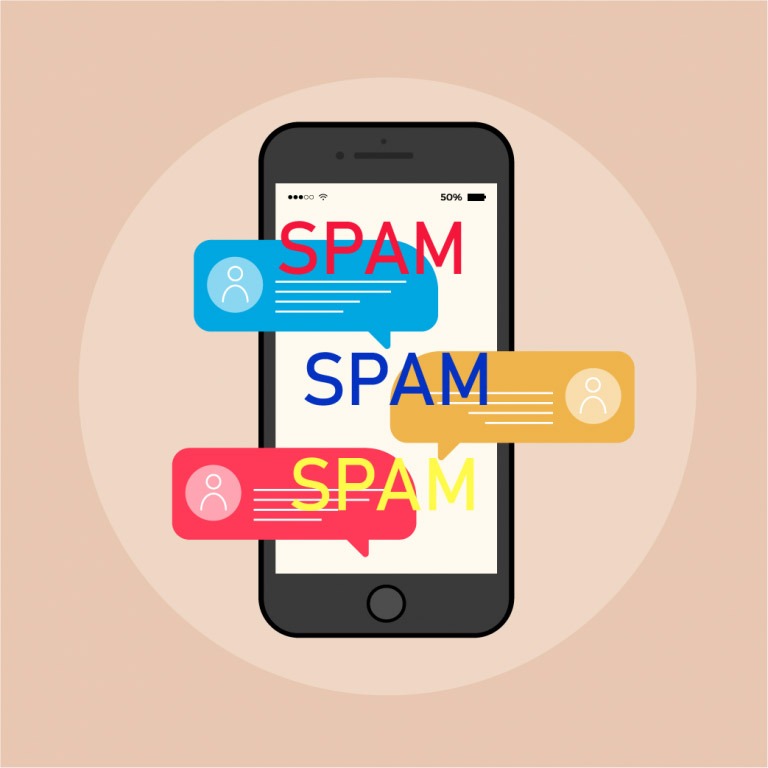

In [8]:
from IPython.display import Image
img = Image(filename='E:\oasis infobyte\spam.jpg')
display(img)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [14]:
ds=pd.read_csv("E:\\oasis infobyte\\spam mail detection\\archive\\spam.csv",encoding='latin')

In [15]:
ds

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [16]:
ds.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
448,ham,LOL ... Have you made plans for new years?,NaN,NaN,NaN
624,ham,"Nah it's straight, if you can just bring bud o...",NaN,NaN,NaN
749,ham,By monday next week. Give me the full gist,NaN,NaN,NaN
754,ham,Realy sorry-i don't recognise this number and ...,NaN,NaN,NaN
580,ham,Huh so early.. Then Ì_ having dinner outside i...,NaN,NaN,NaN
323,ham,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN
2337,ham,Tell your friends what you plan to do on Valen...,NaN,NaN,NaN
950,ham,"Awesome, lemme know whenever you're around",NaN,NaN,NaN
312,ham,He says he'll give me a call when his friend's...,NaN,NaN,NaN
4784,spam,Urgent -call 09066649731from Landline. Your co...,NaN,NaN,NaN


In [17]:
ds.shape

(5572, 5)

In [19]:
print("Rows---->",ds.shape[0])
print("Columns--->",ds.shape[1])

Rows----> 5572
Columns---> 5


In [20]:
ds.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [21]:
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [22]:
ds.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [23]:
ds.isna().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [26]:
ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)

In [27]:
ds

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
ds.shape


(5572, 2)

In [31]:
ds.columns=['spam/ham','sms']

In [32]:
ds.loc[ds['spam/ham']=='spam','spam/ham',]=0
ds.loc[ds['spam/ham']=='ham','spam/ham',]=1

In [33]:
ds

,spam/ham,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# Train the model with spam dataset

In [34]:
x=ds.sms
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [36]:
y=ds['spam/ham']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5572, dtype: object

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [38]:
print(x.shape)

(5572,)


In [39]:
print(xtrain.shape)

(4457,)


In [40]:
print(xtest.shape)

(1115,)


In [41]:
print(ytrain.shape)

(4457,)


In [42]:
print(ytest.shape)

(1115,)


In [43]:
xtrain,xtest

(3075    Mum, hope you are having a great day. Hoping t...
 1787                           Yes:)sura in sun tv.:)lol.
 1614    Me sef dey laugh you. Meanwhile how's my darli...
 4304                Yo come over carlos will be here soon
 3266                    Ok then i come n pick u at engin?
                               ...                        
 789                          Gud mrng dear hav a nice day
 968             Are you willing to go for aptitude class.
 1667    So now my dad is gonna call after he gets out ...
 3321    Ok darlin i supose it was ok i just worry too ...
 1688                     Nan sonathaya soladha. Why boss?
 Name: sms, Length: 4457, dtype: object,
 2632                       I WILL CAL YOU SIR. In meeting
 454     Loan for any purpose å£500 - å£75,000. Homeown...
 983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
 1282    Ever green quote ever told by Jerry in cartoon...
 4610                                  Wat time Ì_ finish?
               

In [44]:
ytrain,ytest

(3075    1
 1787    1
 1614    1
 4304    1
 3266    1
        ..
 789     1
 968     1
 1667    1
 3321    1
 1688    1
 Name: spam/ham, Length: 4457, dtype: object,
 2632    1
 454     0
 983     1
 1282    1
 4610    1
        ..
 4827    1
 5291    1
 3325    1
 3561    1
 1136    0
 Name: spam/ham, Length: 1115, dtype: object)

In [46]:
feat_vect=TfidfVectorizer(stop_words='english',lowercase=True)
feat_vect

TfidfVectorizer(stop_words='english')

In [47]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [48]:
xtrain_vec=feat_vect.fit_transform(xtrain)

In [49]:
xtest_vec=feat_vect.transform(xtest)
print(xtrain)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: sms, Length: 4457, dtype: object


In [50]:
xtrain_vec
print("xtrain----->",xtrain_vec)
print("xtest----->",xtest_vec)

xtrain----->   (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
 

In [51]:
model=LogisticRegression()

In [52]:
model.fit(xtrain_vec,ytrain)

LogisticRegression()

In [53]:
model.score(xtrain_vec,ytrain)

0.9661207089970832

In [54]:
model.score(xtest_vec,ytest)

0.9623318385650225

In [55]:
predict_model=model.predict(xtest_vec)
predict_model

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
accuracy_score(ytest,predict_model)

0.9623318385650225

In [57]:
confusion_matrix(ytest,predict_model)

array([[114,  41],
       [  1, 959]], dtype=int64)

In [59]:
print(classification_report(ytest,predict_model))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

